This script conducts validation tests on the smaller linear models for the Republican primaries. I withhold one year at a time from the trianing data and then test on all elections from that year. I also create a new 'past_turnout' column for each validation model that does not incorporate the turnout from the year being tested. 

In [33]:
#Import packages
import pandas as pd
import re
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor
pd.options.mode.chained_assignment = None 
import numpy as np
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [35]:
#Download data
#Read in data and filter out test data
turnout_train_rep = pd.read_csv("turnout_train_rep.csv")



#filter out 2018 data
turnout_train_rep_use = turnout_train_rep[turnout_train_rep['Year'] != 2018]





R^2:  0.6608340064605105
Mean Absolute Error (MAE): 3.9090709910041688
Mean Squared Error (MSE): 29.060611834391732


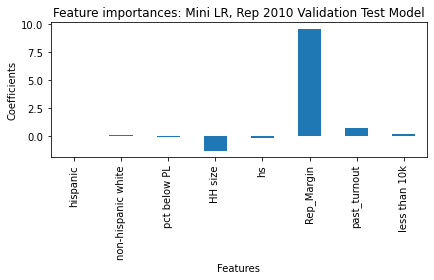

In [53]:
#Validation Test: 2010
np.random.seed(5)

turnout_train_rep_mod = turnout_train_rep_use

#create df for average of past turnout, except for 2018 and 2010.
history_rep = pd.read_csv('history_rep.csv')

history_rep = history_rep[(history_rep['Year'] != 2018) & (history_rep['Year'] != 2010)]
turnout_train_rep_record = history_rep[['Turnout', 'County']]
historical_rep = turnout_train_rep_record.groupby(['County']).mean()

#drop original past turnout column, which includes 2018 and 2010 in the means
turnout_train_rep_mod = turnout_train_rep_mod.drop(['past_turnout'], axis = 1)

#merge historical mean to test df
turnout_train_rep_mod = turnout_train_rep_mod.merge(historical_rep['Turnout'], on = 'County')
#rename columns
turnout_train_rep_mod = turnout_train_rep_mod.rename(columns = {'Turnout_x':"Turnout"})
turnout_train_rep_mod = turnout_train_rep_mod.rename(columns = {'Turnout_y':"past_turnout"})
#Remove 2010 from testing data
turnout_train_rep_mod = turnout_train_rep_mod[turnout_train_rep_mod['Year'] != 2010]

#extract feats and outcomes
model_feats = turnout_train_rep_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type', 'Runoff'], axis = 1)

model_feats = model_feats[['hispanic', 'non-hispanic white', 'pct below PL', 'HH size', 'hs', 'Rep_Margin', 'past_turnout', 'less than 10k']]

model_outcome = turnout_train_rep_mod['Turnout']


#Create model
reg = LinearRegression()
reg.fit(model_feats, model_outcome);
pred = reg.predict(model_feats)

#Print Score

print("R^2: ",reg.score(model_feats, model_outcome))


#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))


#Show Importances
importances = reg.coef_

forest_importances = pd.Series(importances, index=model_feats.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar()
plt.title("Feature importances: Mini LR, Rep 2010 Validation Test Model")
plt.ylabel("Coefficients")
plt.xlabel("Features")
fig.tight_layout()



In [54]:
#Test 2010 gov

np.random.seed(5)


#drop original past turnout column, which includes 2018 and 2010 in the means
turnout_train_rep_mod = turnout_train_rep_use.drop(['past_turnout'], axis = 1)
#merge historical mean to df
turnout_train_rep_mod = turnout_train_rep_mod.merge(historical_rep['Turnout'], on = 'County')
#rename columns
turnout_train_rep_mod = turnout_train_rep_mod.rename(columns = {'Turnout_x':"Turnout"})
turnout_train_rep_mod = turnout_train_rep_mod.rename(columns = {'Turnout_y':"past_turnout"})

#specify election to test on
turnout_train_rep_mod = turnout_train_rep_mod[turnout_train_rep_mod['Election'] == '2010_Rep_Gov']

#specify features and outcome
model_feats = turnout_train_rep_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type', 'Runoff'], axis = 1)

model_feats = model_feats[['hispanic', 'non-hispanic white', 'pct below PL', 'HH size', 'hs', 'Rep_Margin', 'past_turnout', 'less than 10k']]

model_outcome = turnout_train_rep_mod['Turnout']

#Make predictions
pred = reg.predict(model_feats)


#Print Score

print("R^2: ",reg.score(model_feats, model_outcome))


#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))



R^2:  0.6721067491343318
Mean Absolute Error (MAE): 3.710795336438796
Mean Squared Error (MSE): 26.695601811693656


R^2:  0.6770623803926343
Mean Absolute Error (MAE): 3.6968171946862682
Mean Squared Error (MSE): 26.916109138522636


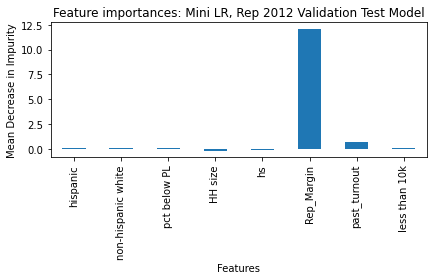

In [45]:
#Validation Test: 2012
np.random.seed(5)

turnout_train_rep_mod = turnout_train_rep_use

#create df for average of past turnout, except for 2018 and 2012.
history_rep = pd.read_csv('history_rep.csv')

history_rep = history_rep[(history_rep['Year'] != 2018) & (history_rep['Year'] != 2012)]
turnout_train_rep_record = history_rep[['Turnout', 'County']]
historical_rep = turnout_train_rep_record.groupby(['County']).mean()

#drop original past turnout column, which includes 2018 and 2012 in the means
turnout_train_rep_mod = turnout_train_rep_mod.drop(['past_turnout'], axis = 1)

#merge historical mean to test df
turnout_train_rep_mod = turnout_train_rep_mod.merge(historical_rep['Turnout'], on = 'County')
#rename columns
turnout_train_rep_mod = turnout_train_rep_mod.rename(columns = {'Turnout_x':"Turnout"})
turnout_train_rep_mod = turnout_train_rep_mod.rename(columns = {'Turnout_y':"past_turnout"})
#Remove 2012 from testing data
turnout_train_rep_mod = turnout_train_rep_mod[turnout_train_rep_mod['Year'] != 2012]

#extract feats and outcomes
model_feats = turnout_train_rep_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type', 'Runoff'], axis = 1)

model_feats = model_feats[['hispanic', 'non-hispanic white', 'pct below PL', 'HH size', 'hs', 'Rep_Margin', 'past_turnout', 'less than 10k']]

model_outcome = turnout_train_rep_mod['Turnout']


#Create model
reg = LinearRegression()
reg.fit(model_feats, model_outcome);
pred = reg.predict(model_feats)

#Print Score

print("R^2: ",reg.score(model_feats, model_outcome))


#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))


#Show Importances
importances = reg.coef_

forest_importances = pd.Series(importances, index=model_feats.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar()
plt.title("Feature importances: Mini LR, Rep 2012 Validation Test Model")
plt.ylabel("Mean Decrease in Impurity")
plt.xlabel("Features")
fig.tight_layout()

In [46]:
#Test 2012 sen

np.random.seed(5)

#drop original past turnout column, which includes 2018 and 2012 in the means
turnout_train_rep_mod = turnout_train_rep_use.drop(['past_turnout'], axis = 1)
#merge historical mean to df
turnout_train_rep_mod = turnout_train_rep_mod.merge(historical_rep['Turnout'], on = 'County')
#rename columns
turnout_train_rep_mod = turnout_train_rep_mod.rename(columns = {'Turnout_x':"Turnout"})
turnout_train_rep_mod = turnout_train_rep_mod.rename(columns = {'Turnout_y':"past_turnout"})

#specify election to test on
turnout_train_rep_mod = turnout_train_rep_mod[turnout_train_rep_mod['Election'] == '2012_Rep_Sen']

#specify features and outcome
model_feats = turnout_train_rep_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type', 'Runoff'], axis = 1)

model_feats = model_feats[['hispanic', 'non-hispanic white', 'pct below PL', 'HH size', 'hs', 'Rep_Margin', 'past_turnout', 'less than 10k']]

model_outcome = turnout_train_rep_mod['Turnout']

#Make predictions
pred = reg.predict(model_feats)


#Print Score

print("R^2: ",reg.score(model_feats, model_outcome))


#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))



R^2:  0.6057953395717763
Mean Absolute Error (MAE): 4.1697209870040215
Mean Squared Error (MSE): 31.842344713554095


In [47]:
#Test 2012 pres

np.random.seed(5)

#drop original past turnout column, which includes 2018 and 2012 in the means
turnout_train_rep_mod = turnout_train_rep_use.drop(['past_turnout'], axis = 1)
#merge historical mean to df
turnout_train_rep_mod = turnout_train_rep_mod.merge(historical_rep['Turnout'], on = 'County')
#rename columns
turnout_train_rep_mod = turnout_train_rep_mod.rename(columns = {'Turnout_x':"Turnout"})
turnout_train_rep_mod = turnout_train_rep_mod.rename(columns = {'Turnout_y':"past_turnout"})

#specify election to test on
turnout_train_rep_mod = turnout_train_rep_mod[turnout_train_rep_mod['Election'] == '2012_Rep_Pres']

#specify features and outcome
model_feats = turnout_train_rep_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type', 'Runoff'], axis = 1)

model_feats = model_feats[['hispanic', 'non-hispanic white', 'pct below PL', 'HH size', 'hs', 'Rep_Margin', 'past_turnout', 'less than 10k']]

model_outcome = turnout_train_rep_mod['Turnout']

#Make predictions
pred = reg.predict(model_feats)


#Print Score

print("R^2: ",reg.score(model_feats, model_outcome))


#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))



R^2:  0.5694966229100924
Mean Absolute Error (MAE): 4.5205324261773985
Mean Squared Error (MSE): 40.216798493661116


R^2:  0.6634825299238368
Mean Absolute Error (MAE): 3.8369465856619662
Mean Squared Error (MSE): 28.76470533830559


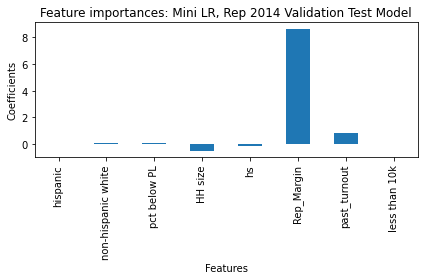

In [48]:
#Validation Test: 2014
np.random.seed(5)

turnout_train_rep_mod = turnout_train_rep_use

#create df for average of past turnout, except for 2018 and 2014.
history_rep = pd.read_csv('history_rep.csv')

history_rep = history_rep[(history_rep['Year'] != 2018) & (history_rep['Year'] != 2014)]
turnout_train_rep_record = history_rep[['Turnout', 'County']]
historical_rep = turnout_train_rep_record.groupby(['County']).mean()

#drop original past turnout column, which includes 2018 and 2014 in the means
turnout_train_rep_mod = turnout_train_rep_mod.drop(['past_turnout'], axis = 1)

#merge historical mean to test df
turnout_train_rep_mod = turnout_train_rep_mod.merge(historical_rep['Turnout'], on = 'County')
#rename columns
turnout_train_rep_mod = turnout_train_rep_mod.rename(columns = {'Turnout_x':"Turnout"})
turnout_train_rep_mod = turnout_train_rep_mod.rename(columns = {'Turnout_y':"past_turnout"})
#Remove 2014 from testing data
turnout_train_rep_mod = turnout_train_rep_mod[turnout_train_rep_mod['Year'] != 2014]

#extract feats and outcomes
model_feats = turnout_train_rep_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type', 'Runoff'], axis = 1)

model_feats = model_feats[['hispanic', 'non-hispanic white', 'pct below PL', 'HH size', 'hs', 'Rep_Margin', 'past_turnout', 'less than 10k']]

model_outcome = turnout_train_rep_mod['Turnout']


#Create model
reg = LinearRegression()
reg.fit(model_feats, model_outcome);
pred = reg.predict(model_feats)

#Print Score

print("R^2: ",reg.score(model_feats, model_outcome))


#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))


#Show Importances
importances = reg.coef_

forest_importances = pd.Series(importances, index=model_feats.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar()
plt.title("Feature importances: Mini LR, Rep 2014 Validation Test Model")
plt.ylabel("Coefficients")
plt.xlabel("Features")
fig.tight_layout()

In [49]:
#Test 2014

np.random.seed(5)

#drop original past turnout column, which includes 2018 and 2014 in the means
turnout_train_rep_mod = turnout_train_rep_use.drop(['past_turnout'], axis = 1)
#merge historical mean to df
turnout_train_rep_mod = turnout_train_rep_mod.merge(historical_rep['Turnout'], on = 'County')
#rename columns
turnout_train_rep_mod = turnout_train_rep_mod.rename(columns = {'Turnout_x':"Turnout"})
turnout_train_rep_mod = turnout_train_rep_mod.rename(columns = {'Turnout_y':"past_turnout"})

#specify election to test on
turnout_train_rep_mod = turnout_train_rep_mod[turnout_train_rep_mod['Election'] == '2014_Rep_Gov']

#specify features and outcome
model_feats = turnout_train_rep_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type', 'Runoff'], axis = 1)

model_feats = model_feats[['hispanic', 'non-hispanic white', 'pct below PL', 'HH size', 'hs', 'Rep_Margin', 'past_turnout', 'less than 10k']]

model_outcome = turnout_train_rep_mod['Turnout']

#Make predictions
pred = reg.predict(model_feats)


#Print Score

print("R^2: ",reg.score(model_feats, model_outcome))


#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))



R^2:  0.5932355362544208
Mean Absolute Error (MAE): 4.230454446841033
Mean Squared Error (MSE): 35.92732047829742


In [50]:
#Test 2014

np.random.seed(5)

#drop original past turnout column, which includes 2018 and 2014 in the means
turnout_train_rep_mod = turnout_train_rep_use.drop(['past_turnout'], axis = 1)
#merge historical mean to df
turnout_train_rep_mod = turnout_train_rep_mod.merge(historical_rep['Turnout'], on = 'County')
#rename columns
turnout_train_rep_mod = turnout_train_rep_mod.rename(columns = {'Turnout_x':"Turnout"})
turnout_train_rep_mod = turnout_train_rep_mod.rename(columns = {'Turnout_y':"past_turnout"})

#specify election to test on
turnout_train_rep_mod = turnout_train_rep_use[turnout_train_rep_use['Election'] == '2014_Rep_Sen']

#specify features and outcome
model_feats = turnout_train_rep_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type', 'Runoff'], axis = 1)

model_feats = model_feats[['hispanic', 'non-hispanic white', 'pct below PL', 'HH size', 'hs', 'Rep_Margin', 'past_turnout', 'less than 10k']]

model_outcome = turnout_train_rep_mod['Turnout']

#Make predictions
pred = reg.predict(model_feats)


#Print Score

print("R^2: ",reg.score(model_feats, model_outcome))


#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))



R^2:  0.6619754141635874
Mean Absolute Error (MAE): 3.7914616281931375
Mean Squared Error (MSE): 26.95480174652758
